# Homework

## Module 5

In this assignment, you are going to work on Histograms and Scatterplots.

We have preprocessed the data as "df" for you. 

Follow the instructions and finish the rest part.

In [1]:
# define location
my_input_path = '../input/'

# define input name
my_input_file_name = 'imdb.xlsx'

# define input files
my_input_file = my_input_path + my_input_file_name

In [2]:
# Loading the data
import pandas as pd
import numpy as np

xls = pd.ExcelFile(my_input_file)
df = xls.parse('imdb')
df_directors = xls.parse('directors')
df_countries = xls.parse('countries')

df = pd.merge(left=df, right=df_countries, 
              how='inner', left_on='country_id', 
              right_on='id')

df = pd.merge(left=df, right=df_directors, 
              how='inner', left_on='director_id', 
              right_on='id')

print("Finished.")

Finished.


In [3]:
df.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
0,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
1,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
2,The Green MileÊ,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
3,The Green MileÊ,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
4,The GodfatherÊ,33,1,R,1972,9.2,134821952,175,1,USA,33,Francis Ford Coppola


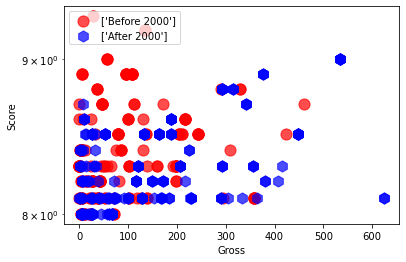

In [4]:
"""Q1: 
Is how much a movie makes indicative of how good it is?
Make a simple scatter plot comparing gross to imdb_score for movies during or after 2000 (title_year >= 2000) and before 2000 (title_year < 2000).
It may be useful to scale the x axis demarking gross. (Hint: Divide the gross amount by 1,000,000.)
Remember to put a legend indicating which color corresponds to which years.
What is your verdict?

Save your plot in a variable called plt1, and your dataframes in variables called df_after_2000 and df_before_2000
"""

import matplotlib.pyplot as plt1

# your code here
df_before_2000 = df[df['title_year'] < 2000]
df_after_2000 = df[df['title_year'] >= 2000]


plt1.scatter(
    df_before_2000["gross"]/1000000, df_before_2000["imdb_score"],
    marker = "o",
    color = 'r',
    alpha = 0.7,
    s = 124,
    label = ['Before 2000']
)

plt1.scatter(
    df_after_2000["gross"]/1000000, df_after_2000["imdb_score"],
    marker = "h",
    color = 'b',
    alpha = 0.7,
    s = 124,
    label = ['After 2000']
)


plt1.xlabel('Gross')
plt1.ylabel('Score')

plt1.legend(loc = 'upper left')

axes = plt1.gca()
axes.set_yscale('log')

plt1.show()


In [5]:
df_after_2000.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
13,The Dark KnightÊ,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
14,The Dark KnightÊ,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
15,The Dark KnightÊ,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
16,The Dark KnightÊ,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
17,The Dark KnightÊ,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan


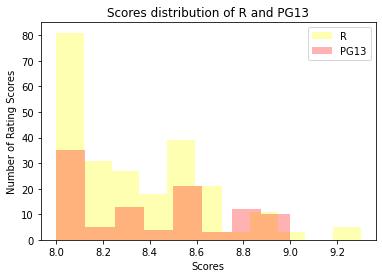

In [6]:
"""Q2: 
Using numpy and pyplot, make an overlapping histogram that shows the score distribution vs. count of R-Rated movies and PG-13 ones.
Describe your plot. 

Save your plot in a variable called plt2, and your dataframes in variables called df_R and df_PG13
"""

import matplotlib.pyplot as plt2

# your code here

df_R = df[df['content_rating']=='R']
df_PG13 = df[df['content_rating']=='PG-13']


df_R_scores = df_R['imdb_score']
df_PG13_scores = df_PG13['imdb_score']


plt2.hist(
    df_R_scores,
    alpha = 0.3,
    color = 'yellow',
    label = 'R',
    bins = 'auto'
)

plt2.hist(
    df_PG13_scores,
    alpha = 0.3,
    color = 'red',
    label = 'PG13',
    bins = 'auto'
)

plt2.xlabel("Scores")
plt2.ylabel("Number of Rating Scores")

plt2.legend(loc = 'best')

plt2.title("Scores distribution of R and PG13")

plt2.show()